# Week 01 - End-to-End Machine Learning

### Aims

By the end of this notebook you 

* understand the basics of end-to-end machine learning project
* play with some data pre-processing tools
* understand the idea of Resamplers and Transformers
* understand the importance of data partitioning
* fit some basic models on your data

### Topics

1. [Problem Understanding and Setup](#setup)

2. [Exploratory Data Analysis](#eda)

3. [Data Preparation](#prep)

4. [Model Exploration](#explore)

5. [Summary](#sum)

6. [Extra](#extra)

---

## General Information

**To kick start this course off we are going to walk through an end-to-end machine learning project!** 

Don't worry about understanding all the specifics just yet, the course has just started and we'll be delving deeper into a lot of what is covered here over the coming weeks. Instead the aim here is to get a broad overview of how an ML project looks like and to get some experience playing around with some of the techniques that we will learn more of as the course goes on. 

- You will find that in a lot of cases you won't need to write much code to answer the exercises (we're just getting started after all!), but as the weeks go on you will find some exercises will require more code to answer. 

- Also as a lot of stuff will be new this week, there is a lot of written text here to help guide you along... don't worry, not all these notebooks are this wordy!

To engage with the workshop material, it is assumed that you have a decent knowledge of data manipulation and visualisation in Python from previous experience and courses. As Python Programming (MATH11199) is a pre-requisite for this course, you may want to recap on some aspects from that course. Some of this material is included on the MLP learn page in the "Week 0" folder. 

This workshop will broadly use the ["Machine Learning Project Checklist"](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md) from Geron (2019) as a stucture:
> - Frame the problem and look at the big picture.
> - Get the data.
> - Explore the data and gain insights.
> - Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
> - Explore many different models and shortlist the best ones.
> - Fine-tune your models and combine them into a great solution.
> - Present your solution.
> - Launch, monitor, and mantain your system.

We will cover a number of them today and by the end of the course you should be familiar with all of the steps above, apart from the last one (skills for this step are beyond the scope of the course).

# 1. Problem Understanding and Setup <a id='setup'></a>

Lets start by examining an example problem based on [previous research](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

## 1.1. Problem
You have been hired by a Portugese wine company that is looking to invest in new technologies for its wine making and selling processes. They are looking to make a _"vinho verde"_ (commonly a white or red wine) and are intested in developing models that can be used to improve their wine making (by identifying the most influential factors) and to stratify their wines (useful for setting prices). For the sake of this workshop we are going to focus on the latter problem, although you may want to come back in later weeks to try tackle finding influential factors.

From this description we have our objectives. At this stage, if working with a client on the project, we may want to discuss in broad terms some additional points. Lets look back at some of the questions we could try ask (as detailed in the lecture):

> - What are their current solutions (baseline model)? 
> - How should performance be measured so it aligns with research/buisness objectives?
> - What are the minimal performance thresholds we are aiming to achieve?
> - Is human expertise available to help the project?

## 1.2. Workspace
Before downloading any data we should think about our workspace. In this course we are going to be primarily be using .ipynb notebooks in the workshops. A notebook environment is very useful for data science projects as it allows for rapid testing of ideas with on-screen visualisation of the results. 

### 1.2.1. Uploading your files to the Noteable

Officially, when you click the **Noteable LTI 1.3.** icon in the course Learn page, you can reach out to the related service. 

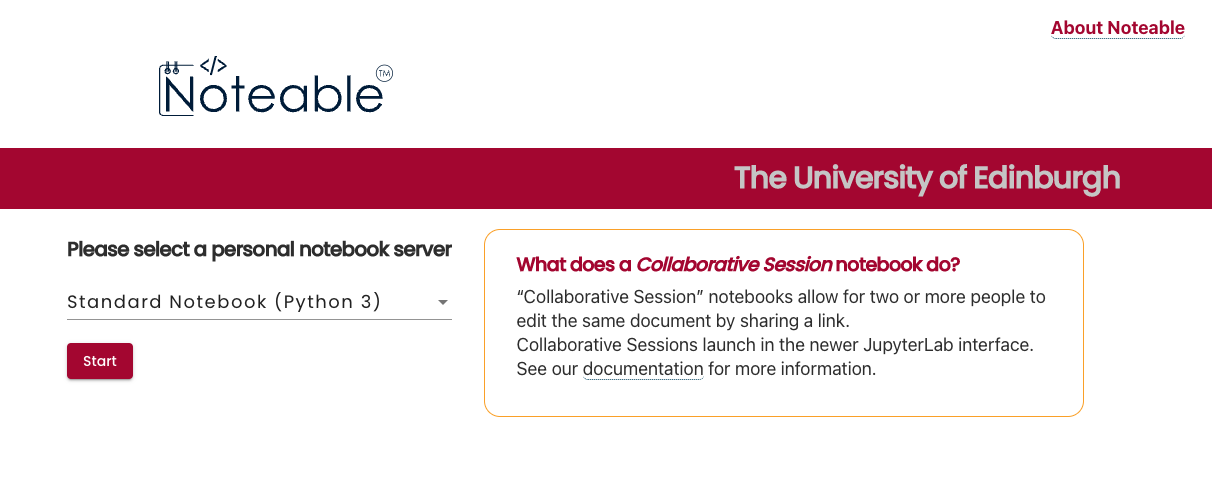

Currently (October 2022), there are various available notebooks on a dropdown list, the one that we need is **Standard Notebook (Python 3)**. When you just click **Start** button and then **Reconnect**, you will have an access to the **Jupyter environment** via Noteable tool. 

Whenever you open a new Python notebook from the New button on the upper right, you will get an empty notebook to work. This notebook will be saved in your noteable account, when you click save button on the above panel after making any changes.  

To keep things organised, you can also create a folder "MLP" within your account, and then a sub-directory for each week like "Week-j". In general, for the workshop materials, this process will be automatic by following a couple of button clicks. Alternatively, if you do this manually, you can then upload the main .ipynb and all necessary files from Learn page to your "Week-j" folder to work with. 

__Reminder__ 

- You may need to restart the runtime several times in the workshop, but you will not need to re-upload or unzip files again. 

### 1.2.2. Displaying solutions

- Solutions will be released after the workshop hand-in deadline via noteable and the course Learn page regularly.   

- Once released you will be able to run the given files in your noteable account, which will allow you to reveal the solutions.

For the details about the use of noteable, please have a look at the related video shared in Learn page, 
under week-1. 



### 1.2.3. Packages

Now lets load in some packages to get us started. The followings are widely used libraries to start working with Python in general. 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

If you need to install any packages from scratch, you need to install related library before calling it. For instance, feature engine is a Python library for Feature Engineering and Selection that we need to know. 

- It is a Python library with multiple transformers to engineer and select features to use in machine learning models.

- Feature-engine preserves Scikit-learn functionality with methods fit() and transform() to learn parameters from and then transform the data.

In [2]:
# One of the packages that we need later
# !pip install feature_engine

  Using cached feature_engine-1.5.2-py2.py3-none-any.whl (290 kB)


In some cases, one can need a component of the whole library. If this is the case, it is possible for importing specific things from a module (library), using the following lines of codes;

In [39]:
from feature_engine.imputation import DropMissingData

## 1.3. Data Download
We need to get our hands on some data. In this case we are going to use The Wine Quality dataset from the UCI website (https://archive.ics.uci.edu/ml/datasets/wine+quality). As this data comes from [previous research](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub) it is already in quite a nice state. In other cases there may be a number of other preparatory stages you may need to go through.

To download the data is straight-forward, we could just get it from the UCI website directly:

```
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

```

...or we can just read it from the "Data" folder we've included.

__Notes__

- I decided to use this dataset for our first workshop as its very popular. You can find 100's of notebooks online that work with this data so its a good one to get started and improve your skills with.

</details>

In [40]:
df_red = pd.read_csv("Data/winequality-red.csv", delimiter=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Before doing anything else we have to do something very important - split our data into training and test sets. 

> - It is important to do it early on (before looking into the data too much) as we may end up focus on specific patterns in our data which lead us to build/focus on models that do not work well on new data. 
> - If we do this, we will not have a good idea of how our model will perform in practice (generalisability).

In [41]:
# Necessary module from sklearn library
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_red,           # data to split
                                     test_size=0.2,    # we will leave 20% to test our models on later
                                     random_state=42,  # make our work reproducable 
                                     shuffle=True)     # prevent data ordering affecting our model

# Displaying the training data set
display(train_df.head())

# Displaying the testing data set
display(test_df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


As you can see above by the index and the code, this has shuffled our data first (`shuffle=True`) and then split our data into two sets. For the sake of later functions, we'll just reset the index so it runs from 0 to the length of the set. Even if this is not an obligatory step in general, notice that this action is to prevent problems caused by the wrong use of `.loc` or `.iloc` at a later stage. 

In [6]:
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

display(train_df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


# 2. Exploratory Data Analysis <a id='eda'></a>

In this section we are going to start with exploring the wine data using methods that you will likely already be familiar with.

Hopefully by now you should have a pretty good idea what we consider as data. Data can come in a broad range of forms encompassing a collection of discrete objects, numbers, words, events, facts, measurements, observations, or even descriptions of things. Processing data using exploratory data analysis (EDA) can elicit useful information and knowledge by examining the available dataset to discover patterns, spot anomalies, test hypotheses, and check assumptions using statistical measures. 

Lets start by looking at what varibles we have in our data to work with.

In [7]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Below is a __Data Dictionary__ which describes what each feature represents. Have a read through but for the sake of this workshop you don't need to worry about understanding the precise details.

> - `fixed acidity`: It indicates the amount of tartaric acid in wine and is measured in g/dm$^3$.
> - `volatile acidity`: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.
> - `citric acid`: It indicates the amount of citric acid in the wine. It is also measured in g/dm3.
> - `residual sugar`: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3.
> - `free sulfur dioxide`: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3. 
> - `total sulfur dioxide`: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.
> - `density`: It indicates the density of the wine and is measured in g/dm3.
> - `pH`: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity. 
> - `sulphates`: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.
> - `alcohol`: It indicates the alcohol content in the wine. 
> - `quality`: It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.

As further reading, you can check out the given source below: 
- Mukhiya, S. K., & Ahmed, U. (2020). Hands-On Exploratory Data Analysis with Python.

Now onto the tasks, where we will begin to get a basic understanding of the data. 

>- You will see some CORE and EXTRA tasks for the first workshop. 
>- Primarily, you should aim to complete the CORE components during the WS session, but afterwards try to complete the EXTRA tasks for your self-learning process. 
>- In general, weekly hand-ins attached to our WS sessions, would be beneficial for your projects in the long run
>- In some Exercises, you will see some beneficial hints

---

### 🚩 Exercise 1 (CORE)

Examine the datatypes for each column.

---
 
### 🚩 Exercise 2  (CORE)

Get some descriptive information about the data (e.g. mean, standard deviation, ect.). 
- Is there anything in particular you notice in any of the variables that may warrent further examination?

---
As the problem we are trying to address is to stratify the wines we will be using "quality" as the output/target varible for our models. 

In [8]:
output = "quality"

Using the string above, we are going to split the data again, in a different way. This time we are going to create a pandas `Series` called `y_train`, which contains our output variable, and then remove this variable from our training `DataFrame` so that it only includes the other variables (`X_train`).

__Note__
- For visualisation purposes you may want to keep a version of the data (in this case `train_df`) with the target still in there.

In [9]:
y_train = train_df.loc[:,output]
X_train = train_df.drop(output, axis=1)

feature_names = list(X_train.columns)

print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


You can do a similar thing for your test data by following a similar way, as a small hands-on here

---

### 🚩 Exercise 3  (CORE)

Use `sns.countplot` to examine how many unique values are present in `y_train`.

__Why might we want to do this?__

Later in the course we will learn about the affects of "imballanced" data on models (where there is much more of one class than another).

---

### 🚩 Exercise 4  (CORE)

Find out if any of the features from our training set (`X_train`) are highly correlated.

__Why might we want to do this?__
- For __Linear models__ (e.g. linear or logistic regression), multicolinearity can yield varying and possibly numerically unstable solutions.
- For __Random forests__ highly correlated features can mask feature interactions.
- For __Model interpretability__ a simpler model is generally preferable and more easily interpretatble. 
- Generally...the learning algorithm will be __faster__ if we use this information to reduce the number of features.

We will learn more about all these reasons given above in later weeks, but for now just take my word for it that its generally a good idea to remove them or (sometimes preferably) to combine them with feature extraction techniques (e.g. PCA).

In [10]:
# For the size of plot, more readable figure
sns.set(rc={'figure.figsize': (14, 8)})

---

### 🚩 Exercise 5  (CORE)

Examine the distributions (e.g. gaussian, right or left skewed?) of the different variables.

__Why might we want to do this?__

Some models and preparation steps assume certain distributions, as we will discuss in later weeks.

<br>
<details><summary><b><u>Hint</b></u></summary>
You could use a histogram:
    
- Using Pandas: `X_train[variable_name].hist()`
- Using Seaborn: `sns.histplot(X_train[variable_name])`
- Using Matplotlib: `plt.hist(X_train[variable_name])`
    
You could also examine a probability plot (`scipy.stats.probplot(df[variable], dist="norm")`) or even compute the sample skewness (`scipy.stats.skew(X_train[variable_name])`).
</details>

In [11]:
# Necessary module for the probability plot 
import scipy.stats as stats

# 3. Data Pre-Processing <a id='prep'></a>

Now we have some familiarity with the data though our data exploration, lets start preparing our data to be modelled.

From here on in, we should really be creating functions for our data transformations. This is because when we want to run data through our "model pipeline" in the future, rather than having to copy and paste a load of code, we can just use a series of functions. In this notebook, we will do this with our validation set and at the very end with our test set, but this would also be required if you deploy your model in a "live" environment. Furthermore, when refining a model it makes it easier for us to treat our preparation choices as "hyperparameters", meaning we can easily add or remove parts of our pipeline to see what works and what doesn't.

Its also worth examining what is meant by a **"Pipeline"**. 

- A general definition is that it is just a sequence of data preparation operations that is ensured to be reproducible. 

- However, we may want to ensure that any functions/classes we make for our pipeline have specific attributes that work best with the tools available in our chosen machine learning library. 

- In this course we are mostly going to be using `Scikit-learn`, with a little `Keras` at the end for neural networks.

__Scikit-learn__

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning (https://scikit-learn.org/stable/getting_started.html). 

It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. 

In Scikit-Learn a `Pipeline` is a class we can use to combine our pre-processing and modelling steps together (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

A `Pipeline` is useful for many reasons, including that they help prevent you from data leakage, i.e. disclosing some testing data in your training data. Objects that go into a scikit-learn `Pipeline` can either be _transformer_ or _estimator_ classes, or, if we use an imbalanced-learn `Pipeline` instead, also _resamplers_.

All three of these objects (_resamplers_, _transformers_, and _estimator_) all typically have a `.fit()` method, which is used to...
- ...validate and interpret any parameters, 
- ...validate the input data, 
- ...estimate and store attributes from the parameters and provided data, 
- ...return the fitted estimator to facilitate method chaining in a pipeline. 

Along with other sample properties (e.g. `sample_weight`), the `.fit()` method usually takes 2 inputs:

> - The samples matrix (or design matrix) X. The size of X is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.
>
> - The target values y which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the i th entry corresponds to the target of the i th sample (row) of X.
>
> https://scikit-learn.org/stable/getting_started.html

Other methods available for these objects other than `.fit()` will depend on what they are, so we will look at each of these objects in turn and then combine them into a model pipeline later in this workshop.

---

## 3.1. Data Cleaning

At this stage in our workflow we may want to deal with duplicated/missing values and (optionally) fix/remove outliers. We'll have more of a look at outliers over the next few weeks, but for this week lets just look at the former issue.

We want to remove duplicates as they may bias our fitted model. In other words, we may potentially *overfit* to this subset of points. However, care should usually be taken to check they are not _real_ data with identical values.

There a number of ways we could identify duplicates, the simplest one (and the approach we'll focus on) is just to find observations with the same feature values. Of course this will not identify things such as spelling errors, missing values, address changes, use of aliases, ect. For those such things, more complicated methods along with manual assessment is needed.

### 🚩 Exercise 6  (CORE)

How many duplicated observations are present in the features?

<br>
<details><summary><b><u>Hint</b></u></summary>

With Pandas dataframes you can use `.duplicated()` to get a boolean of whether something is a duplicate and then use `.sum()` to count how many there are.
</details>

### 🚩 Exercise 7  (CORE)

Write a function named `drop_duplicated` that takes the `X_train` and `y_train` objects, and outputs these objects with the duplicate observations removed.

__Notes__
- It may be tempting to overwrite `X_train` and `y_train` while working on our pre-processing steps. __Don't do this!__ We will run these objects through these steps inside our pipeline later so if you want to test your function make sure to assign the output to tempory objects (e.g. `X_train_, y_train_`).
- For this week (for ease), your functions can output a `pd.DataFrame` or a `np.Array`. Next week we'll look at working only with numpy arrays (which is more common).

<details><summary><b><u>Hint</b></u></summary>
Your function could work using the following steps:
    
- has `X` and `y` as inputs (features and targets), 
    
- adds the targets as a new column on the end of the features data,
    
- drops the duplicate observations,
    
- outputs the `X` and `y` separately again.
    
If your really stuck you can peek ahead at a later part of the workbook and find `drop_duplicated` function below
</details>

In [14]:
# Open the comments to run this code cell

def drop_duplicated(X,y):
    df = pd.concat([X,y], axis=1)
    df = df.drop_duplicates()
    return df.iloc[:,:-1], df.iloc[:,-1]

---

If we want to remove duplicate _observations_ from our training data using a function that is compatible with a `Pipeline`, we are going to need to turn it into a _resampler_.

__Resamplers__

Resamplers are classes that follow the scikit-learn API and have a sampling functionality through the `.resample()` method. Like all other scikit-learn methods, they have a `.fit()` method which is only applied during pipeline training. This means if we want to create our own resampler from scratch that is compatible with scikit-learn, we just have to make a class that has three methods; `.fit()`,  `.resample()`, and `.fit_resample()`; with the latter just chaining the other two together.

Therefore to resample a dataset, each sampler implements:

```
obj.fit(data, targets)
data_resampled, targets_resampled = obj.resample(data, targets)
```

or simply...

```
data_resampled, targets_resampled = obj.fit_resample(data, targets)
```

We'll look more into making custom pipeline functions next week, but for this week we can just wrap our function we just made in the handy `FunctionSampler` from `imblearn` to make it compatible.

__Notes__
- Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.
- We need a resampler to drop any duplicate observations in our dataset as these objects are used to reduce or increase the number of samples (observations) in both our feature data (`X_train`) and our targets (`y_train`) data.
- _"Unlike scikit-learn, imbalanced-learn provides support for pandas in/out. Therefore providing a dataframe, will output as well a dataframe"_<sup>1</sup>.
- Don't worry if you are stuggling to understand classes as we introduce them this week, we'll get more practice over the coming weeks!

1. https://imbalanced-learn.org/stable/introduction.html
2. https://imbalanced-learn.org/stable/auto_examples/applications/plot_outlier_rejections.html#sphx-glr-auto-examples-applications-plot-outlier-rejections-py

In [12]:
# Install the imblearn library first by
# !pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [15]:
# Call the necessary part of the module
from imblearn import FunctionSampler

# create a sampler using our function
duplicated_sampler = FunctionSampler(func=drop_duplicated,    # our custom function
                                     validate=False)          # prevents both inputs being changed to numpy arrays

Now above-created `duplicated_sampler` is ready to use for the next exercise. Note that turning-off **validation** allows to use the `FunctionSampler` with any type of data.

---

### 🚩 Exercise 8  (CORE)

Using `.fit` and `.resample`, or `.fit_resample`, check to see if the `duplicated_sampler` reduces the number of observations in the training data.

__Note__
- Make sure to not overwrite your training data!

<br />
<details><summary><b><u>Hint</b></u></summary>    
Consider combining the defined `duplicated_sampler` and `.fit_resample`.
</details>

---

### 🚩 Exercise 9  (CORE)

Are there any missing values in the training data? 
- Can you think of any options we would have to account for them?

__Why might we want to do this?__

Bear in mind that most models (including all models in scikit-learn) cannot handle missing data.

---

### 🚩 Exercise 10 (EXTRA)

Create a `Pipeline` compatible resampler that could remove any NA values from the data.

<br />
<details><summary><b><u>Hint</b></u></summary>
    
It will be very similar to using the other resampler above except using `.dropna()`.
</details>

---

## 3.2. Feature Selection

This optional step can occour at many points during out ML pipeline development. Feature selection is typically used to drop attributes that provide no useful information for the task. It is part of __Dimension Reduction__ (alongside feature extraction) which we will cover in more detail in week 3.

As feature selection reduces the number of _features_ (not observations!) in our data, meaning we don't need to change our _target_ data (y), in a `Pipeline` these are called _"transformers"_.

__Transformers__

- Transformers in Scikit-Learn [clean](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), [reduce](https://scikit-learn.org/stable/modules/unsupervised_reduction.html#data-reduction), [expand](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation), or [generate](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction) feature representations.

- Transformers are classes with a `.fit()` method, which learn model parameters (e.g. mean and standard deviation for normalization) from a training set, and a `.transform()` method which applies this transformation model to data<sup>1</sup>. To create a custom transformer, all you need is to create a class that implements three methods: `fit()`, `transform()`, and `fit_transform()`.

Therefore to transform a dataset, each sampler implements:

```
obj.fit(data)
data_transformed = obj.transform(data)
```

or simply...

```
data_transformed = obj.fit_transform(data)
```

1. https://scikit-learn.org/stable/data_transforms.html

---

This week lets add a basic feature selection technique into our pipeline: dropping any feature that is highly correlated with another feature (we looked at correlated features in Exercise 4).

We could create our own feature selection transformers from scratch, however there are also a bunch of relevent pre-made transformers available to us already in `scikit-learn` and `feature_engine`, so we will use these this week.

However lets do something first... as we will focus on next week, a pandas dataframe can be used with scikit-learn objects but they will typically output NumPy arrays or SciPy sparse matrices (this is quite a sensible design choice as explained [here](https://arxiv.org/abs/1309.0238)). Nevertheless, some transformers (especially those outside of the core scikit-learn library) may require a certain type of object. In the case of `feature_engine` (which we will use for feature selection in a second), they want pandas DataFrames. The functions you have already worked on may already be outputing dataframes, but lets make a function here we can put in our pipelines just in case to prevent any future errors.

In [16]:
# Necessary modules 
import scipy
import warnings
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# adding a single entry into warnings filter
# warnings.simplefilter('error', UserWarning)

def DfTransformer(X, column_names = None):
    X_ = X.copy() # so we do not alter the input data
    
    # turn to a pandas df if a numpy array
    if isinstance(X_, (np.ndarray, np.generic)):
        X_ = pd.DataFrame(X_, columns = column_names)
    
    # turn to a pandas df if sparse
    elif scipy.sparse.issparse(X_):
        X_ = pd.DataFrame.sparse.from_spmatrix(X_, columns = column_names)
    
    # change the column names if provided and not the same
    elif isinstance(X_, pd.DataFrame):
        if not column_names==None and set(list(X_.columns)) == set(column_names):
            X_.columns = column_names
    
    else:
        warnings.warn("""{} not a supported input. Input needs to be in:
        [np.ndarray, np.generic, scipy.sparse, pd.DataFrame]""".format(type(X_)))
        
    return X_

DataframeTransformer = FunctionTransformer(DfTransformer,
                                           kw_args = {"column_names":feature_names})

X_train_ = DataframeTransformer.fit_transform(X_train)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


---
One important issue might be the collinearity on the considered set of features/predictors. To work out, by using the `DropCorrelatedFeatures` function from `feature_engine.selection`, you can drop any features that are correlated above a certain theshold. Thereafter, you can print out the features that were dropped.


__Notes__
- A selected threshold in the below example (0.6 threshold) may be a bit low, but used here for demonstration purposes.

- Look at the documentation (https://feature-engine.readthedocs.io/en/1.0.x/selection/DropCorrelatedFeatures.html#), how does this function decide which of the correlated features to drop?

- Instead of using `.fit_resample()`, we will now need to use `.fit_transform()`.

- You may want to look at `.correlated_feature_sets_` attribute of the class to see which features were correlated.

- You could use `np.setdiff1d` to compare which features were dropped from a list of the original features and a list of the new datas features.

In [17]:
# !pip install feature_engine
from feature_engine.selection import DropCorrelatedFeatures

fs = DropCorrelatedFeatures(variables = None, 
                            method = 'pearson', 
                            threshold = 0.6)

X_train_fs = fs.fit_transform(X_train)

print("Correlated Feature Groups")
display(fs.correlated_feature_sets_)

print("Dropped")
list(np.setdiff1d(list(X_train.columns), list(X_train_fs.columns)))

Correlated Feature Groups


[{'citric acid', 'density', 'fixed acidity', 'pH'},
 {'free sulfur dioxide', 'total sulfur dioxide'}]

Dropped


['citric acid', 'density', 'pH', 'total sulfur dioxide']

## 3.3. Feature Engineering

Briefly, feature engineering means formulating appropriate features given the data, the model, and the task. We will look into it more next week.

- Would feature engineering require a _"resampler"_ or a _"transformer"_ class?

Feature engineering requires a _"transformer"_ class as we only need to alter the features and not the number of observations.

For this week lets look at log transforming our features so that they have a more gaussian distribution (an assumption of a number of the models we will use later). Log transformations are useful for altering the data to have a more normal distribution as they pull in the more extreme high values relative to the median, while stretching back extreme low values away from the median.

### 🚩 Exercise 11  (CORE)

Using either the pre-made `LogTransformer()` from `feature_engine.transformation`, or a custom function and `sklearn.preprocessing.FunctionTransformer`, transform any skewed features using a log transform. 

- What is the effect of this transformation?

__Note__
- `LogTransformer` is useful before because it has a `variables` method which means you can select which features to apply it too. However, as we will learn next week, we can also limit the columns a transformer is applied to in a pipeline using a wrapper function in scikit-learn as well.

<br />
<details><summary><b><u>Hints</b></u></summary>

- If the `variables` argument is left as the default (`None`), `LogTransformer()` identifies and applies the logarithm to __all the numerical variables__ in the dataset. Alternatively, you can indicate which variables we want to transform.

- You cannot log transform a 0 value, so sometimes it helps to just +1.

</details>

In [18]:
# Necessary module from feature_engine
from feature_engine.transformation import LogTransformer

---

## 3.4. Feature Scaling

As we will discuss in later weeks, many machine learning algorithms are sensitive to the scale and magnitude of the features. For these algorithms, feature scaling will improve performance and training times. Here we will "standardise" our features by centering the variable at zero and standardizing the variance to 1. In order to do this we subtract the mean from each observation and then divide the result by the standard deviation:

$$z=\frac{x-mean(x)}{std(x)}.$$

The result of the preceding transformation is called the *z-score* and represents how many standard deviations a given observation deviates from the mean <sup>1</sup>.

1. Galli, S. (2020). Python Feature Engineering Cookbook.

---

### 🚩 Exercise 12  (CORE)

Using the `StandardScaler` transformer from `sklearn.preprocessing`, scale the features (`X_train`).

<br />
<details><summary><b><u>Hints</b></u></summary>

You can use...
- ...`.mean_` on the scaler object find the mean of the features.
- ...`.scale_` find the standard deviation value of the features.
</details>

In [19]:
# Necessary module from sklearn
from sklearn.preprocessing import StandardScaler

---

### 🚩 Exercise 13 (EXTRA)

Using the handy conversation function `sklearn.preprocessing.FunctionTransformer`, make transformer that standardises our data. 

---

# 4. Model Exploration <a id='explore'></a>

Now you would explore a series of models from different machine learning categories (e.g. linear, non-linear, forests, neural networks). For this workshop we are only going to check a few models on their default parameters until we learn more about them thoughout the course.

Before moving on we are going to split our data again into a training and validation set. 

>- We do this because later we want to get an idea of how different pre-processing steps and models will perform on data it was not trained on. 
>- If we did this with our test set, we'd be tweeking our model to get better and better on this set and probably start to overfit to the specifics of this set (therefore its no longer a good measure of generalisation performance). 
>- Instead we are going to split our training data again and see how different models affect a validation set. 
>- We can use this validation set to guide pipeline changes with the comfort of knowing that when it comes time to assess our pipeline on our test set, that will give us a representative of generalisation performance as we'll only look at it right at the end.

__Side Notes__
- As you will learn about in future weeks, leaving your models on default parameters is generally a bad idea, but we'll do it for now until we understand the models more!
- If your data is huge, you could subsample your training set here as well while checking different pre-processing and model steps (although this may penalize more complex models). 

In [20]:
# Lets keep a copy for if we want them later
X_train_full, y_train_full = X_train.copy(), y_train.copy()

# Data splitting again over the training data now
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, # data to split
                                                  test_size = 0.2,    # we will leave 20% to test our models on later
                                                  random_state = 42,  # make our work reproducable 
                                                  shuffle = True)     # prevent data ordering affecting our model

# Resetting the index values for both train and validation sets
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_val = X_val.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

Models in scikit-learn are _estimator_ classes. Like `resamplers` and `transformers` before them, estimators also have a `.fit()`. However, once the estimator is fitted, it can be used for predicting target values of new data using `.predict()`. This means you don’t need to re-train the estimator each time you want to make a prediction.

Therefore to model and predict values of a dataset, each  _estimator_ implements:

```
obj.fit(data)
data_predictions = obj.predict(data)
```

or simply...

```
data_predictions = obj.fit_predict(data)
```

---

## 4.1. Regression

Lets start with regression. You will probably already be familiar with the basics of regression. We'll be doing a recap and going deeper into linear and non-linear regression from a machine learning perspective at a later stage. We'll start by just fitting a basic linear regression model using `sklearn`.

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Great, now lets assess its performance. In later weeks we'll learn lots of different metrics (and learn its important to use more than just 1!), but for now we will just use Coefficient of Determination ($R^2$) which is the default.

__What is $R^2$?__

Without worrying about the details to much yet, it is a measure of the proportion of the variance in the dependent variable that is predictable from the independent variables and is the default scoring method for regression models in scikit-learn.

__What is considered a good score?__

Well it depends on the data but... 
- ...a value of 1.0, that means our model is perfectly fitting our data. 
- ...a value of 0.5 would mean that 50% of the variability in the outcome data is explained by the model.
- ...ect.

We could of course fit our model, make predictions, and calculate the $R^2$ ourselves or we could just use the `.score()` method. Lets start by having a look at how it did modelling our training data.

In [22]:
round(reg.score(X_train, y_train), 3)

0.359

So after rounding, we can explain 36% of the datas variability using this model. Lets start by checking the performance on the validation set to get an idea of its "generalisation performance".

__Note__
- If you get a different result than above you may have already altered the training data with pre-processing steps - don't do this yet... this is a task in a minute...

In [23]:
round(reg.score(X_val, y_val), 3)

0.268

However in the validation set we can only explain 27% of the datas variability using this model. 

- This suggests our model is better at modelling our training data than our validation data. 

- This is common and would mean we should try tweek our model to reduce the difference between the training and validation performance.

Another natural question is the following;

What if our model wasn't learning anything? What $R^2$ score might we expect?

- (optional) To check this you can fit a `DummyRegressor` (from `sklearn.dummy`), to the training data and assess its $R^2$ on the training and validation sets. How does it compare to the `LinearRegression` model? 

In [24]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
dummy.fit(X_train, y_train)

print("Training Score")
print(round(dummy.score(X_train, y_train), 3))
print("Validation Score")
print(round(dummy.score(X_val, y_val), 3))

Training Score
0.0
Validation Score
-0.015


- The dummy model that just predicts the mean would have a $R^2$ of 0 on the training set. This because $R^2$ is effectively just measuring how good the model is compared to a horizontal line, and that is all the dummy model is doing here with the data mean.

- The validation score is a minus because, for this data, the mean of the training set is not as good a measure of the data variance as the mean of the validation set.

---
But wait we haven't used our pre-processing steps yet before feeding the data to the model! Lets remind ourselves of what our pre-processing steps are and then chain them together in a `Pipeline`. For the below one, only 4 steps are available, but 2 more can be added as you can realize from the lines of `lt = LogTransformer()` and `scaler = StandardScaler()`

In [25]:
from imblearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

# remove duplicated values
def drop_duplicated(X,y):
    df = pd.concat([X,y], axis=1)
    df = df.drop_duplicates()
    return df.iloc[:,:-1], df.iloc[:,-1]

DD =  FunctionSampler(func=drop_duplicated,
                      validate=False)

# Makes sure the data is a dataframe
DT = FunctionTransformer(DfTransformer,
                         kw_args = {"column_names":feature_names})

# drops correlated features
fs = DropCorrelatedFeatures(threshold=0.6)

# log transforms all variables, assuming that Ex 11 is answered correctly
# otherwise this part can be removed from the below pipeline 
# lt = LogTransformer()

# standardises all variables, assuming that Ex 12 is answered correctly
# otherwise this part can be removed from the below pipeline 
# scaler = StandardScaler() 

# here is the model we want to use.
reg = LinearRegression()

# create our pipeline for the data to go through.
# This is a list of tuples with a name (useful later) and the function.
reg_pipe = Pipeline([
    ("drop_duplicated", DD),
    ("make_dataframe", DT),
    ("feature_selection", fs),
    # ("log_transformer", lt), OPEN the comment if you have your LogTransformer from Ex 11
    # ("scaler", scaler), OPEN the comment if you have your LogTransformer from Ex 12
    ("model", reg)
])

reg_pipe

Pipeline(steps=[('drop_duplicated',
                 FunctionSampler(func=<function drop_duplicated at 0x7fe422f63280>,
                                 validate=False)),
                ('make_dataframe',
                 FunctionTransformer(func=<function DfTransformer at 0x7fe422fe04c0>,
                                     kw_args={'column_names': ['fixed acidity',
                                                               'volatile '
                                                               'acidity',
                                                               'citric acid',
                                                               'residual sugar',
                                                               'chlorides',
                                                               'free sulfur '
                                                               'dioxide',
                                                               'total sulfur '
                                                               'dioxide',
                                                               'density', 'pH',
                                                               'sulphates',
                                                               'alcohol']})),
                ('feature_selection', DropCorrelatedFeatures(threshold=0.6)),
                ('model', LinearRegression())])

Lets see if this has improved performance?

In [27]:
reg_pipe.fit(X_train, y_train)

print("Training Score")
print(round(reg_pipe.score(X_train, y_train), 3))
print("Validation Score")
print(round(reg_pipe.score(X_val, y_val), 3))

Training Score
0.348
Validation Score
0.251


...Okay so in this case maybe not. But we may be able to improve the pipeline by tuning it later. Maybe we don't need all these steps, or maybe there are better models to use? Lets look at different models to start with.

---

### 🚩 Exercise 14 (EXTRA)

See if other regression models can be used to improve performance.

a) create a `pipeline` with `PolynomialFeatures(include_bias=False)` in between the `"log_transformer"` and `"scaler"`.

__Note__

- `PolynomialFeatures()` enables our regression model to capture "non-linear" relationships between our variables (we'll look at this more next week).
- `include_bias=False` just stops the function ading a bias column as our `LinearRegression` object is going to add one for us anyway.

You can try to benefit from the following source:

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [28]:
# Necessary module from sklearn 
from sklearn.preprocessing import PolynomialFeatures

b) create a different `pipeline` with `DecisionTreeRegressor()` used instead of the `LinearRegression` model.

__Note__
- This time you don't want to have `PolynomialFeatures()`.

You can try to benefit from the following source:

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [29]:
# Necessary module from sklearn
from sklearn.tree import DecisionTreeRegressor

c) How do these models compare to the standard `LinearRegression` pipeline according to their $R^2$ performance?

---
You may be thinking, well I could have done all that without bothering with making sure my functions were compatible with a `Pipeline`. There are two main reasons why we suggest using them:

__Ensures Information Bleed Prevention__

- If we did all our preprocessing steps before splitting the data into training and validation steps, we would bleed information from our validation set for training the models. For example, we scaled our features which requires us taking a mean and standard deviation of the data we'll train our model on. If these means and standard deviations include the data we will use for validation they may very slightly improve our result and then when we later make predictions on the test set we may find performance is slightly worse than expected as we truely did not use any information from that set! 

- Over time these small amounts of information bleed may add up and mean our validation set is no longer as useful assessing how our model performs on other data.

So did this effect us because we did pre-processing steps before splitting our data? 
**Nope because we use pipelines.** 

- When we used `.fit(X_train, y_train)` as above, this overwrites the parameters of the pre-processing steps and the model so we can be assured this only reflects information from this set. 

- Sure you could go step by step using `.fit_transform()` on your data and passing the output to the next function, but this would not be as simple as putting them all in a `Pipeline`. 

- Another way round would be to split your data into training and validation sets before pre-processing your data to stop you needing to re-fit your pre-processing steps later. This would work, but using a `Pipeline` works well with other validation methods too (so saves us some additional coding).

__Works well with Different Validation Methods__

Heres where `Pipelines` really start to get useful (and we'll see more extensions of this over the coming weeks). 

- So far we've used the `train_test_split` function to split the training set into a smaller training set and a validation set, which we have used to validate our models. 

- This works well, but by partitioning the available data into three sets, we reduce the number of samples that can be used for learning the model, and the results depend on the random choice of the pair of (train, validation) sets. 

- A great alternative is therefore to use Scikit-Learn’s `_K-fold cross-validation_` feature. A test set should still be held out for final evaluation, but **the validation set is no longer needed when doing CV**. 

When doing **k-fold cross-validation**, the training set is split into $k$ smaller sets and:

- A model is trained using $k-1$ of the folds as training data.

- The resulting model is validated on the remaining part of the data.

The performance measure reported by k-fold cross-validation is therefore the average of the values computed in the loop. Although more computationally expensive than a single split, it does not waste too much data (particularly useful when the number of samples is very small) and gives us more robust assessment of performance. Don't worry if you are stuggling to understand what is k-fold cross-validation as we will introduce them next week in detail. 

Again, using a `Pipeline` with this method will ensure there is no information bleed between our different folds. Lets have a look how we could evaluate our initial linear regression pipeline below with them.

__Note__
- You can use `cross_val_score` if you just want the validation score.
- Note `cross_validate` calls the validation performance the `test_score`, to be clear this is the validation performance and should not be used as "test"! This is why I rename it in the `tidy_scores` function below.

In [33]:
from sklearn.model_selection import cross_validate

# tidy the output into a dataframe
def tidy_scores(score_dict):
    df = pd.DataFrame(score_dict)
    df.loc['mean'] = df.mean()
    df.loc['sd'] = df.std()
    df.rename({"test_score":"val_score"}, axis=1, inplace=True)
    df.index.name = "fold"
    return df.round(2)

scores = cross_validate(reg_pipe, X_train_full, y_train_full, cv=5, return_train_score=True)
tidy_scores(scores)

,fit_time,score_time,val_score,train_score
fold,,,,
0,0.01,0.0,0.24,0.35
1,0.01,0.0,0.29,0.34
2,0.01,0.0,0.27,0.34
3,0.01,0.0,0.34,0.33
4,0.01,0.0,0.44,0.31
mean,0.01,0.0,0.32,0.34
sd,0.00,0.0,0.07,0.02


---

### 🚩 Exercise 15 (EXTRA)

Assess the performance of the other regression pipelines made above (one with `PolynomialFeatures(include_bias=False)` and the other with a `DecisionTreeRegressor`) using `cross_validate`. 
- Do these results change your intepretation of the best model pipeline?

---
At this point you would normally begin to examine how the fitted models are working and what are the most most useful variables for each algorithm. Investigating this may give you a deeper insight into the data and inform another quick round of feature selection and engineering. However, for now we are just going to skip this until we learn more about the models on the course.

---
# 5. Summary <a id='sum'></a>

For the sake of this workshop, you are now roughly done. We will be going over a lot of this stuff over the rest of the course, so don't worry if there are areas you want more information on. However hopefully you feel we have addressed the aim of getting an overview of how a typical machine learning project looks like.

- This workshop we worked through a number of the steps required as part of a machine learning project. 

- We were introduced to scikit-learn and specifically how to use a `pipeline` to string multiple steps together. 

- It may seem like unneccesary extra work, but as we introduce more complex methods, they will become incredibly useful and save time.

- However, still, we may proceed by using different paths regarding the problem at hand instead of `pipeline` idea. 

# 6. What Else ? <a id='extra'></a>

Remember that the our data wine data set has a response, 'quality' of the red wine. Just for the illustration, we fit a linear regression model above to start with but we did not say anything about whether the tyep of response is suitable or not. If you have a look at your response variable, you will see that it is actually a categorical variable to represent different quality levels. 

In [34]:
y_train.value_counts()

5    426
6    413
7    131
4     33
8     11
3      9
Name: quality, dtype: int64

- Although, fitting linear regression is computationally possible, the output itself indeed is missing regarding the response type at hand. 

- Since it includes different categories of wine quality, we need to treat it as a categorical variable before fitting any model. 

- Certainly, this impacts the model that we need to search for. Below are extra information about possible further steps in the model development process and additional tasks.

---

## Classification

As we mentioned above, our response is a categorical variable having 6 different categories at the beginning. For the sake of simplicity, lets change the output variable to a binary output (0 or 1) and have a look at some classification models.

__Note__
- You may be wondering if you could turn this into a function and add this into a `Pipeline` using the `FunctionSampler`. As far as I can tell you can't because samplers are _only_ applied when fitting (training) the model, and not when making predictions. We need our labels to be changed in this binary way for both fitting the model and making predictions - so we do this before putting it though our pipeline.

In [35]:
replace_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1, 10:1}

y_train_ = y_train.replace(replace_dict)
y_val_ = y_val.replace(replace_dict)

display(y_train.value_counts().sort_index())
display(y_train_.value_counts())

3      9
4     33
5    426
6    413
7    131
8     11
Name: quality, dtype: int64

0    881
1    142
Name: quality, dtype: int64

When we look at the frequencies of the binary outputs (counts on 0 and 1 values), we still have "imballanced" data which will likely affect our model performance but lets not worry about that for now.

---

### 🚩 Exercise 16 (EXTRA)

Using the following pipeline workflow (`"drop_duplicated"`, `"feature_selection"`, `"log_transformer"`, `"scaler"`, `"model"`), assess the training and validation set performance of the following models (on their default settings):
- `DummyClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
- `LogisticRegression` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- `KNeighborsClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

__Note__
- Using the `.score()` method on classification models defaults to "Accuracy". 
    - Put simply, Accuracy is just: correct predictions / total predictions * 100.0. 
    - Like `R^2` in regression, we want this to be high (close to 1). 
    - Like regression we will examine classification performance metrics in much more detail over the rest of the course.

---

## About Model Refinement

Now you will want to fine-tune your models. 

- Normally you would select a couple of models which are making different errors to examine in more detail but for the sake of this workshop we are just going to look at the best regression (Linear Regression) and classifier (K-Nearest-Neighbors) models.

- To fine tune your model you want to change your models "hyperparameters". 

- At the moment we have mostly been using each model on their default parameters, but most have settings we can change. However, as we haven't explained any of these models yet we are going to leave these on default. 

- Instead we are going to try improve model performance by changing our data transformations (we'll be looking at this in more detail next week as well).

---
Remove and/or change some of the pre-processing steps to see if you can improve both the "best" regression and classification model performance*. Here are some things you can try:

- Remove the duplicated observations/feature selection/transformer/scaling step from the pipeline.
- Change the `threshold` for the `DropCorrelatedFeatures`.

__Notes__
- Instead of deleting or hashing out a pipeline step you want to skip, you can specify the name string as `"passthrough"` or set the resampler/transformer/estimator to `None`. This is useful later in the course when we get onto using automated methods to refine our models.

*_At the moment we are going to do this all manually, but in the coming weeks you will learn how to automate this process._

To give a simple example, consider the following pipeline with changed threshold value for the `DropCorrelatedFeatures`:

In [36]:
# remove duplicated values
def drop_duplicated(X,y):
    df = pd.concat([X,y], axis=1)
    df = df.drop_duplicates()
    return df.iloc[:,:-1], df.iloc[:,-1]

DD =  FunctionSampler(func=drop_duplicated,
                      validate=False)

# Makes sure the data is a dataframe
DT = FunctionTransformer(DfTransformer,
                         kw_args = {"column_names":feature_names})

# drops correlated features
fs = DropCorrelatedFeatures(threshold=0.75)

# here is the model we want to use.
reg = LinearRegression()

# create our pipeline for the data to go through.
# This is a list of tuples with a name (useful later) and the function.
reg_pipe = Pipeline([
    ("drop_duplicated", DD),
    ("make_dataframe", DT),
    ("feature_selection", fs),
    ("model", reg)
])

reg_pipe.fit(X_train, y_train)

print("Training Score")
print(round(reg_pipe.score(X_train, y_train), 3))
print("Validation Score")
print(round(reg_pipe.score(X_val, y_val), 3))

Training Score
0.358
Validation Score
0.27


It seems that the increase on the `threshold` avoid collinearity issue more, and this has a positive impact on the model performance over train and validation test. Since the value of Coefficient of Determination ($R^2$) is increased for both data sets. 

What about the perfomance of the model on the *test set* ? For this calculation, we need;

- Prediction of the fitted model using the given feature values under test data (like a new data set)

- Comparison of the difference between the original response values stored in the test data and predicted response values coming from the above-fitted linear model. 

In [37]:
y_test = test_df.loc[:, output]
X_test = test_df.drop(output, axis=1)

feature_names = list(X_train.columns)

print(X_test.shape)
print(y_test.shape)

print("Test Score")
print(round(reg_pipe.score(X_test, y_test), 3))

(320, 11)
(320,)
Test Score
0.41


---
## Presentation and Deployment

Now with your models are complete you would present your findings in a report worded appropriately for the intended audience (e.g. business people, statistician, engineer). 

- Here is where you may improve your visualisations and present your findings in an interesting way.

- Part of this is getting a final assessment of the generalisation performance for your final models to present (what the test set is for). 

- The reason we leave it so late is because it is important that you do not tweak your model after doing this as this will mean that you would just start to overfit to your test set! Overfitting is the reason at this point that your model may perform better on the training and validation sets than the test set. 

- If so, don't worry too much (its to be expected), we'll be learning a few other techniques to reduce this over the semester.

---
>- It maybe that your model is going to be adopted into practice. At this point, depending on your skills, you may work with an engineer to get your code production ready (e.g. impliment unit tests, performance and input monitoring, retraining secedules), or if your better at coding just do it yourself.
>- In this case you can provide your client a model that when they input properties of a wine it predicts the "quality" of the wine. This could be used to help guide the clients on how to price the wine.

---

### 🚩 Exercise 17 (SELF-STUDY)

If you are feeling extra keen;

- Why not do the above process again with the white wine dataset. 

- Are your results similar or different? 

Maybe you want to come back to this after learning a bit more on the course. Its entirely up to you and could be a good practice for your self-study. 

In [52]:
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                       delimiter=";")

# df_white.head()